In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from math import factorial
import pandas as pd

# Ein Würfel

In [2]:
def spiel_mir_das_spiel_der_grossen_zahlen(anzahl_ausfuehrungen):
    absolute_haeufigkeiten = {
        1: 0,
        2: 0,
        3: 0,
        4: 0,
        5: 0,
        6: 0
    }
    for _ in range(anzahl_ausfuehrungen):
        neuer_zufallswurf = random.randint(1, 6)
        absolute_haeufigkeiten[neuer_zufallswurf] += 1
    relative_haeufigkeiten = {k: float(v) / anzahl_ausfuehrungen for k, v in absolute_haeufigkeiten.items()}
    return absolute_haeufigkeiten, relative_haeufigkeiten

Mittelwert absolut:  16666.6666667
Mittelwert relativ: 0.166666666667
Absolute Häufigkeiten:  {1: 16637, 2: 16606, 3: 16620, 4: 16922, 5: 16810, 6: 16405}
Relative Häufigkeiten:  {1: 0.16637, 2: 0.16606, 3: 0.1662, 4: 0.16922, 5: 0.1681, 6: 0.16405}


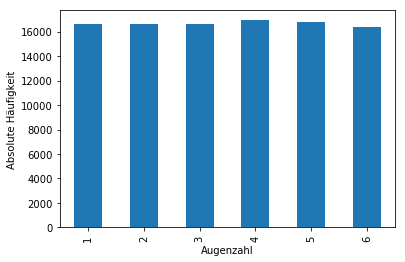

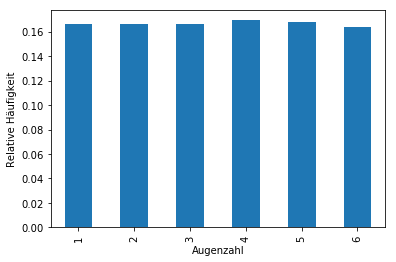

In [3]:
ANZAHL_WUERFE = 100000

absolute_haeufigkeiten, relative_haeufigkeiten = spiel_mir_das_spiel_der_grossen_zahlen(ANZAHL_WUERFE)
print "Mittelwert absolut: ", float(ANZAHL_WUERFE) / 6
print "Mittelwert relativ: {}".format( 1.0 / 6)
print "Absolute Häufigkeiten: ", absolute_haeufigkeiten
print "Relative Häufigkeiten: ", relative_haeufigkeiten
df_absolute_haeufigkeiten =pd.DataFrame({"Augenzahl": absolute_haeufigkeiten.keys(), "Absolute Häufigkeit": absolute_haeufigkeiten.values()})
ax_abs = df_absolute_haeufigkeiten.plot.bar(x="Augenzahl", y="Absolute Häufigkeit", legend=None)
ax_abs.set_xlabel('Augenzahl')
ax_abs.set_ylabel(u'Absolute Häufigkeit')
df_relative_haeufigkeiten =pd.DataFrame({"Augenzahl": relative_haeufigkeiten.keys(), "Relative Häufigkeit": relative_haeufigkeiten.values()})
ax_rel = df_relative_haeufigkeiten.plot.bar(x="Augenzahl", y="Relative Häufigkeit", legend=None)
ax_rel.set_xlabel('Augenzahl')
ax_rel.set_ylabel(u'Relative Häufigkeit')
plt.show()

# Zwei Würfel

## Wie gross ist die Wahrscheinlichkeit, mit zwei Würfeln eine Doppelsechs zu werfen?

In [4]:
def anz_doppelsechsen(anzahl_ausfuehrungen):
    anzahl_erfolge = 0
    for _ in range(anzahl_ausfuehrungen):
        zufaellige_zahl_wuerfel_1 = random.randint(1, 6)
        zufaellige_zahl_wuerfel_2 = random.randint(1, 6)
        if zufaellige_zahl_wuerfel_1 == 6 and zufaellige_zahl_wuerfel_2 == 6:
            anzahl_erfolge += 1
    return anzahl_erfolge, float(anzahl_erfolge) / anzahl_ausfuehrungen

In [5]:
anzahl_ausfuehrungen = 1000000
abs_haeufigkeit, rel_haeufigkeit = anz_doppelsechsen(anzahl_ausfuehrungen)
print "Absolute Häufigkeit: {}".format(abs_haeufigkeit)
print "Relative Häufigkeit: {}".format(rel_haeufigkeit)
print "Wahrscheinlichkeit gemäss Modell: {}".format(1.0 / 36.0)

Absolute Häufigkeit: 27784
Relative Häufigkeit: 0.027784
Wahrscheinlichkeit gemäss Modell: 0.0277777777778


## Wie gross ist die Wahrscheinlichkeit, mit zwei Würfeln die Augensumme 7 zu werfen?

In [6]:
def zaehle_wuerfe_mit_gegebener_augensumme(anzahl_ausfuehrungen, augensumme):
    anzahl_erfolge = 0
    for _ in range(anzahl_ausfuehrungen):
        zufaellige_zahl_wuerfel_1 = random.randint(1, 6)
        zufaellige_zahl_wuerfel_2 = random.randint(1, 6)
        if zufaellige_zahl_wuerfel_1 + zufaellige_zahl_wuerfel_2 == augensumme:
            anzahl_erfolge += 1
    return anzahl_erfolge, float(anzahl_erfolge) / anzahl_ausfuehrungen

In [7]:
abs_haeufigkeit, rel_haeufigkeit = zaehle_wuerfe_mit_gegebener_augensumme(100000, 7)
print "Absolute Häufigkeit: {}".format(abs_haeufigkeit)
print "Relative Häufigkeit: {}".format(rel_haeufigkeit)

Absolute Häufigkeit: 16605
Relative Häufigkeit: 0.16605


# Schätzung von Pi

In [8]:
def schaetze_pi(anzahl_ausfuehrungen):
    zufaellige_punkte = [(random.random(), random.random()) for _ in range(anzahl_ausfuehrungen)]
    points_in = []
    points_out = []
    relative_haeufigkeiten = []
    nb_points_inside = 0
    for ind, zuf_punkt in enumerate(zufaellige_punkte):
        if (math.pow(zuf_punkt[0] - 0.5, 2) + math.pow(zuf_punkt[1] - 0.5, 2)) <= 0.25:
            nb_points_inside += 1
            points_in += [zuf_punkt]
        else:
            points_out += [zuf_punkt]
        relative_haeufigkeiten += [float(nb_points_inside) / float(ind + 1)]    
    fig, ((ax_square, ax_conv), (ax_off, ax_conv_small)) = plt.subplots(2, 2)
    x_in, y_in = zip(*points_in)
    point_size = 5
    ax_square.scatter(x_in, y_in, color="g", s=point_size)
    x_out, y_out = zip(*points_out)
    ax_square.scatter(x_out, y_out, color="r", s=point_size)
    circle = plt.Circle((0.5, 0.5), radius=0.5, fill=False)
    ax_square.add_artist(circle)
    ax_square.set_xlim(0, 1)
    ax_square.set_ylim(0, 1)
    ax_square.set_aspect('equal', adjustable='box')
    ax_square.set_xlabel(u"x")
    ax_square.set_ylabel(u"y")
    limit = math.pi / 4
    for ax in [ax_conv, ax_conv_small]:
        ax.plot(relative_haeufigkeiten, "-")
        ax.axhline(limit, color="g")
        if ax == ax_conv:
            ax.set_ylim(0, 1)
            ax.set_yticks(np.arange(0, 1.0001, 0.05))
        if ax == ax_conv_small:
            print "hier"
            y_min = 0.75
            y_max = 0.85
            ax.set_ylim(y_min, y_max)
            ax.set_yticks(np.arange(y_min, y_max, 0.01))
        ax.grid()
        ax.set_xlabel(u"Anzahl Ausführungen")
        ax.set_ylabel(u"Relative Häufigkeit")
    ax_off.axis("off")
    fig.set_size_inches(22, 22)
    plt.show()
    return relative_haeufigkeiten[-1], limit

hier


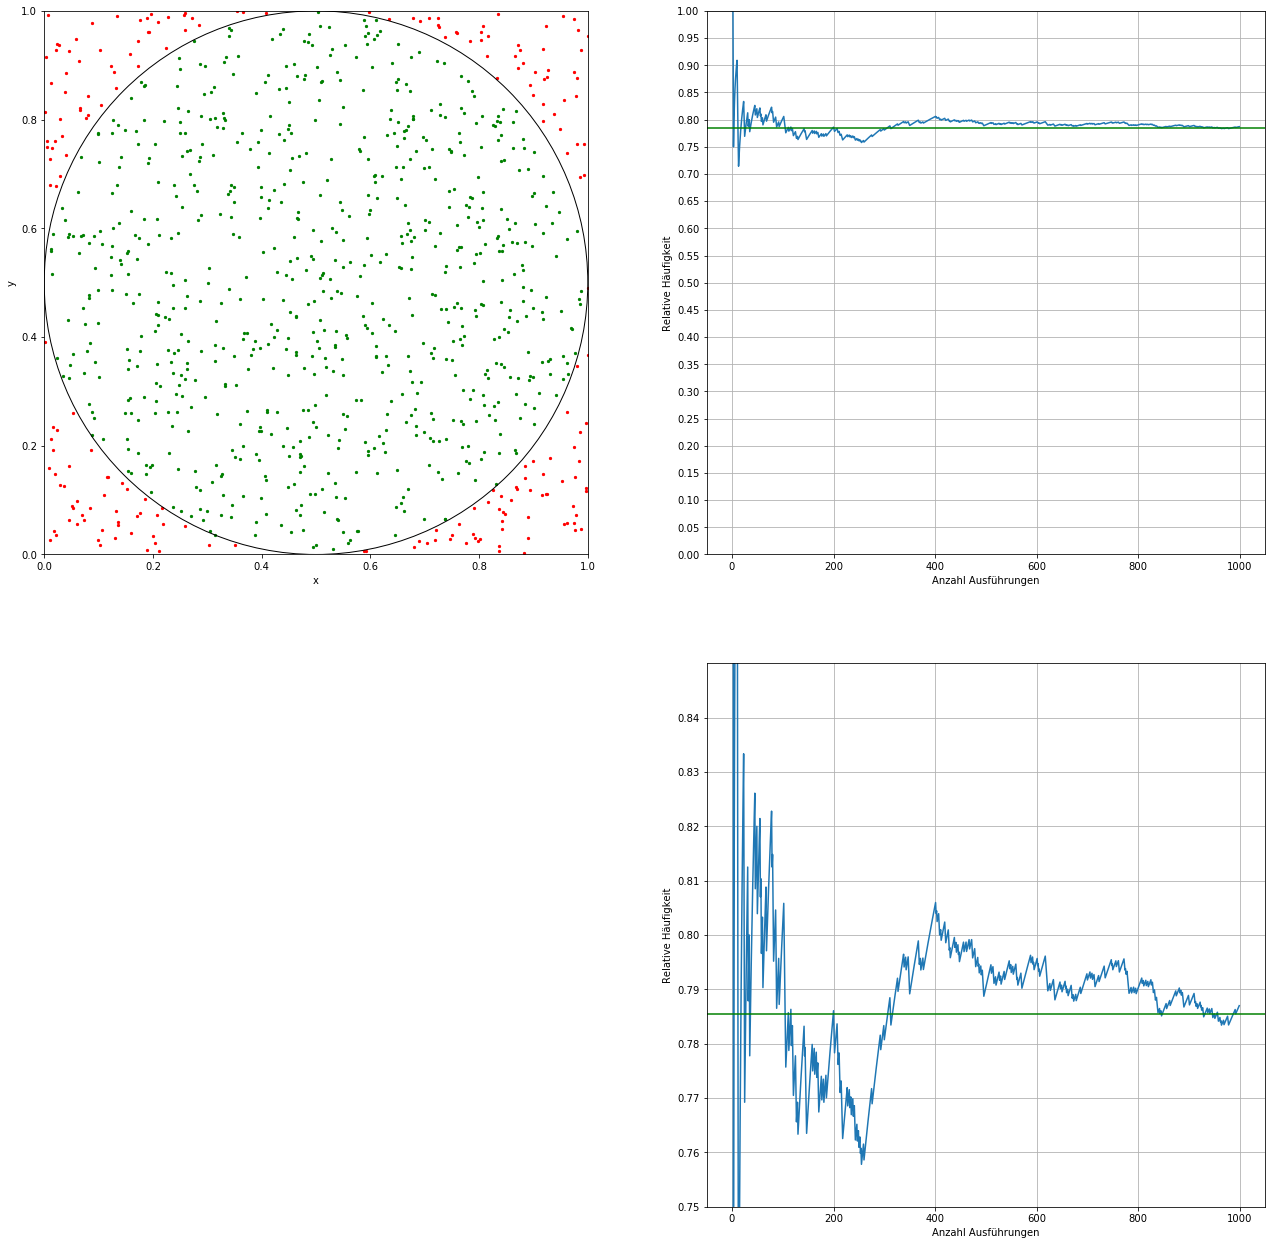

Erwartet: 0.785398163397, relative Häufigkeit: 0.787, Abweichung in %: 0.203952170657%


In [9]:
relative_haeufigkeit, erwartet = schaetze_pi(1000)
print "Erwartet: {}, relative Häufigkeit: {}, Abweichung in %: {}%".format(erwartet, relative_haeufigkeit, (relative_haeufigkeit / erwartet - 1) * 100)

# Geburtstagsparadoxon

In [10]:
def fuehre_geburtsagsexperiment_aus(anzahl_ausfuehrungen, anzahl_personen=23):
    def erzeuge_geburtstage_und_teste_auf_mehrfache(anz_personen):
        zufaellige_geburtstage = [random.randint(1, 365) for _ in range(anz_personen)]
        if len(zufaellige_geburtstage) == len(set(zufaellige_geburtstage)):
            return 0
        else:
            return 1
    list_hat_mehrfache_geburtstage = [erzeuge_geburtstage_und_teste_auf_mehrfache(anzahl_personen) for _ in range(anzahl_ausfuehrungen)]
    relative_haeufigkeiten = []
    cum_sum = 0
    for ind, ist_mehrfach in enumerate(list_hat_mehrfache_geburtstage):
        cum_sum += ist_mehrfach
        relative_haeufigkeiten += [float(cum_sum) / float(ind + 1)]
    exp = 1.0
    for i in range(anzahl_personen):
        exp *= float(365 - i) / 365
    exp = 1 - exp
    fig, ((ax_0_1), (ax_small)) = plt.subplots(1, 2)
    ax_0_1.plot(relative_haeufigkeiten, "-")
    ax_0_1.axhline(exp, color="g")
    ax_0_1.set_ylim(0, 1)
    ax_0_1.set_yticks(np.arange(0, 1.00001, 0.05))
    ax_0_1.grid()
    ax_0_1.set_xlabel(u"Anzahl Ausführungen")
    ax_0_1.set_ylabel(u"Relative Häufigkeit")
    
    ax_small.plot(relative_haeufigkeiten, "-")
    ax_small.axhline(exp, color="g")
    ax_small.set_ylim(0.4, 0.6)
    ax_small.set_yticks(np.arange(0.4, 0.60001, 0.01))
    ax_small.grid()
    ax_small.set_xlabel(u"Anzahl Ausführungen")
    ax_small.set_ylabel(u"Relative Häufigkeit")
    fig.set_size_inches(20, 8)
    plt.show()
    return float(sum(list_hat_mehrfache_geburtstage)) / anzahl_ausfuehrungen, exp

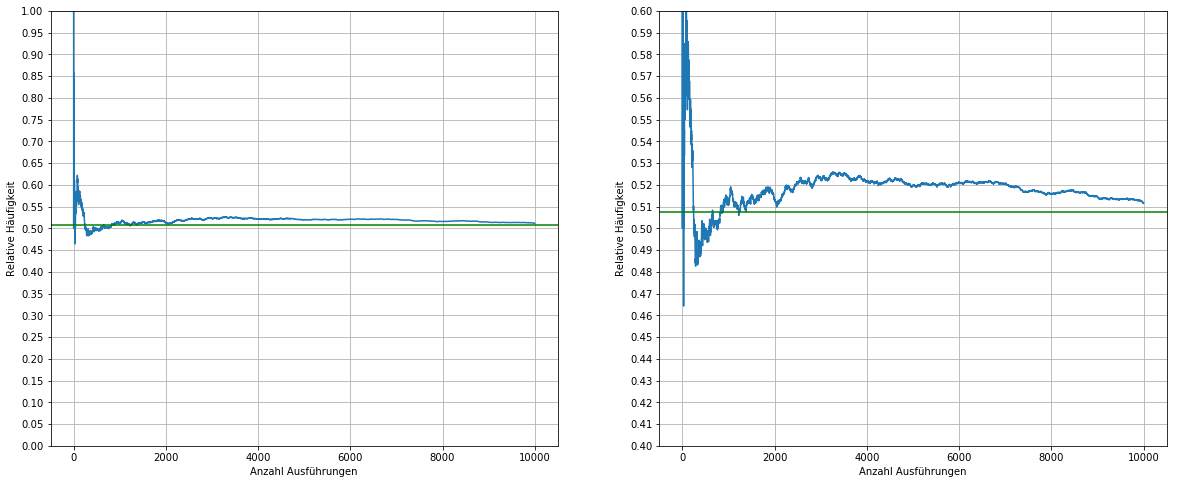

(0.5117, 0.5072972343239857)

In [11]:
fuehre_geburtsagsexperiment_aus(10000)

## Lotto

In [12]:
def ziehe_k_aus_n(n, k):
    li = range(1, n + 1)
    res = []
    for i in range(k):
        r = random.randint(0, len(li) - 1)
        res += [li[r]]
        del li[r]
    return sorted(res)

In [13]:
ziehe_k_aus_n(42, 6)

[6, 7, 21, 29, 35, 38]

In [14]:
def spiele_lotto_k_aus_n(tip, n=42, k=6):
    if len(tip) != k:
        raise ValueError("length of tip must be k")
    ziehung = ziehe_k_aus_n(n, k)
    return {
        "tip": tip,
        "ziehung": ziehung,
        "anzahl_richtige": len(set(ziehung).intersection(set(tip)))
    }

In [15]:
spiele_lotto_k_aus_n([1, 2, 3, 4, 5, 6])

{'anzahl_richtige': 0,
 'tip': [1, 2, 3, 4, 5, 6],
 'ziehung': [17, 21, 29, 34, 40, 42]}

In [16]:
def simuliere_anzahl_richtige_lotto(anzahl_ausfuehrungen, n=42, k=6):
    anz_richtige = {i: 0 for i in range(k + 1)}
    for _ in range(anzahl_ausfuehrungen):
        tip = ziehe_k_aus_n(n, k)
        ar = spiele_lotto_k_aus_n(tip, n, k)["anzahl_richtige"]
        anz_richtige[ar] += 1
    return anz_richtige, {i: float(anz_richtige[i]) / float(anzahl_ausfuehrungen) for i in range(k + 1)}

In [17]:
def nb_comb(n, k):
    return factorial(n) / factorial(k) / factorial(n - k)

In [18]:
nb_comb(42, 6)

5245786L

In [19]:
n = 42
k = 6
anzahl_ausfuehrungen = 100000
res = simuliere_anzahl_richtige_lotto(anzahl_ausfuehrungen, n, k)
print "anzahl richtige experiment absolute haeufigkeiten: {}".format(res[0])
n_aus_k = nb_comb(42, 6)
theorie_wkeit = {r: float(nb_comb(6, r) * nb_comb(n - k, k - r)) / float(n_aus_k) for r in range(0, k + 1)}
theorie_abs = {r: theorie_wkeit[r] * float(anzahl_ausfuehrungen) for r in range(0, k + 1)}
print "anzahl theoretisch erwartet: {}".format({k: "{:.4f}".format(v) for k, v in theorie_abs.items()})
print "anzahl richtige experiment relative haeufigkeiten: {}".format({k: "{:.4f}".format(v) for k, v in res[1].items()})
print "wahrscheinlichkeit theoretisch erwartet: {}".format({k: "{:.4f}".format(v) for k, v in theorie_wkeit.items()})
pd.DataFrame.from_records([res[0], theorie_abs, res[1], theorie_wkeit]).transpose().round(5).reset_index().rename(columns={
    "index": "Anzahl Richtige",
    0: "Absolute Haeufigkeit Expermient", 
    1: "Erwartete Anzahl Theorie", 
    2: "Relative Häufigkeit Experiemnt", 
    3: "Wahrscheinlichkeit Theorie"
}).astype({"Absolute Haeufigkeit Expermient": "int32"})

anzahl richtige experiment absolute haeufigkeiten: {0: 37114, 1: 42988, 2: 17027, 3: 2678, 4: 191, 5: 2, 6: 0}
anzahl theoretisch erwartet: {0: '37130.6035', 1: '43119.4105', 2: '16843.5197', 3: '2722.1850', 4: '180.1446', 5: '4.1176', 6: '0.0191'}
anzahl richtige experiment relative haeufigkeiten: {0: '0.3711', 1: '0.4299', 2: '0.1703', 3: '0.0268', 4: '0.0019', 5: '0.0000', 6: '0.0000'}
wahrscheinlichkeit theoretisch erwartet: {0: '0.3713', 1: '0.4312', 2: '0.1684', 3: '0.0272', 4: '0.0018', 5: '0.0000', 6: '0.0000'}


,Anzahl Richtige,Absolute Haeufigkeit Expermient,Erwartete Anzahl Theorie,Relative Häufigkeit Experiemnt,Wahrscheinlichkeit Theorie
0,0,37114,37130.60350,0.37114,0.37131
1,1,42988,43119.41051,0.42988,0.43119
2,2,17027,16843.51973,0.17027,0.16844
3,3,2678,2722.18501,0.02678,0.02722
4,4,191,180.14460,0.00191,0.00180
5,5,2,4.11759,0.00002,0.00004
6,6,0,0.01906,0.00000,0.00000
